In [1]:
# モジュールのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 機械学習用
from sklearn import datasets
from collections import Counter

In [2]:
# あやめデータの読み込み
iris = datasets.load_iris()
df = pd.DataFrame(
    iris.data,
    columns = iris.feature_names
)
df["label"] = iris.target

df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

In [3]:
# データのシャッフル
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.8               4.0                1.2               0.2   
1                5.1               2.5                3.0               1.1   
2                6.6               3.0                4.4               1.4   
3                5.4               3.9                1.3               0.4   
4                7.9               3.8                6.4               2.0   

   label  
0      0  
1      1  
2      1  
3      0  
4      2

In [4]:
# トレーニングデータとテストデータへの分割
train_size = 75
train_data = df.iloc[:train_size].values
test_data = df.iloc[train_size:].values

In [5]:
# knn による分類を行う関数
def knn(k, train_data, test_data):
    labels = []
    
    for test in test_data:
        
        # 1. すべてのトレーニングデータとtest（このループステップでラベルを予測したいデータ）との距離を計算したリストを作る
        # train_data[:,:-1] : トレーニングデータの特徴量
        # test[:-1] : テストデータの特徴量
        distances = np.sum((train_data[:,:-1]-test[:-1])**2, axis=1)
        
        # 2. 距離リストの値が小さい順に並べた、トレーニングデータのインデックスを持つリストを作る
        sorted_train_indexes = np.argsort(distances)
        
        # 3. インデックスリストを元に、testから近いk個のトレインデータのラベルを取り出す
        sorted_k_labels = train_data[sorted_train_indexes, -1][:k]
        
        # 4. sorted_k_labelsの中で最も数の多かったlabelを取り出す
        label = Counter(sorted_k_labels).most_common(1)[0][0]
        labels.append(label)
    return labels

In [6]:
# 分類
pred_labels = knn(2, train_data, test_data)

In [7]:
# 正答率
np.sum(pred_labels == test_data[:,-1]) / len(test_data)

0.9333333333333333

Text(0.5,1,'true label')

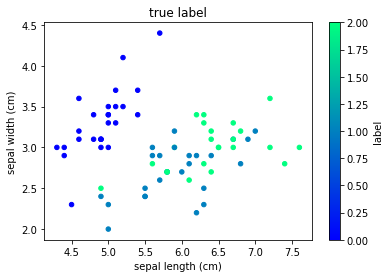

In [8]:
# 特徴量データとその正しい分類
test_df = df.iloc[train_size:].copy()
test_df["pred_label"] = pred_labels
 
test_df.plot(kind="scatter", x=0,y=1,c="label", cmap="winter")
plt.title("true label")

Text(0.5,1,'prediction label')

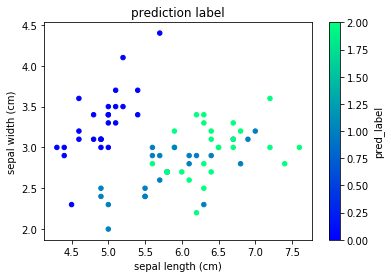

In [9]:
# 特徴量データと knn によって判定した分類結果
test_df.plot(kind="scatter", x=0,y=1,c="pred_label", cmap="winter")
plt.title("prediction label")

In [10]:
# 適切な k の検討
max_k = 10 # 検討する k の最大値
validity = np.zeros(max_k) # 正答率を格納する配列
for i in range(1, max_k+1) :
    pred_labels = knn(i, train_data, test_data)
    validity[i-1] = np.sum(pred_labels == test_data[:,-1]) / len(test_data)

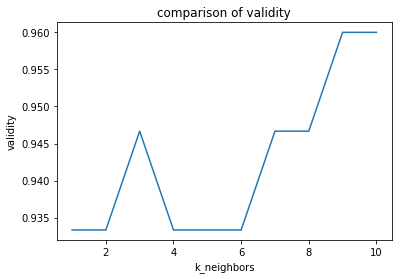

In [11]:
# k による正答率の変化をグラフ化
plt.plot(range(1, max_k+1), validity)
plt.xlabel("k_neighbors")
plt.ylabel("validity")
plt.title("comparison of validity")
plt.show()